### Notebook description:

This notebooks should: 
1. Use t-SNE or UMAP to visualize frame embeddings in CLIP space
1. Define clusters
1. Wrap clasters in bboxes
1. Get cluster centers

In [33]:
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())

from tqdm import tqdm
import shutil
import torch
import numpy as np
import matplotlib.pyplot as plt

In [7]:
DATA_DIR = Path('data')
embs_path = DATA_DIR / 'processed_images.pickle'
assert embs_path.exists()

In [8]:
import pickle
from dataclasses import dataclass

@dataclass
class ImageEmbedding:
    """Class for keeping track of an item in inventory."""
    emb: torch.Tensor # clip image embedding: B, 768
    filename: Path

    def __init__(self, filename: str, emb: torch.Tensor):
        self.filename = filename
        self.emb = emb

def write_pickle(filename, obj):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle)

def read_pickle(filename):
    with open(filename, 'rb') as handle:
        return pickle.load(handle)

In [11]:
embs_data = read_pickle(embs_path)
len(embs_data)

8201

# Draw UMAP

In [37]:
!pip install umap-learn umap-learn[plot] #https://github.com/lmcinnes/umap

     |████████████████████████████████| 4.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 61.3 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 50.3 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 99.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.5 MB 54.6 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 295 kB 92.5 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 969 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 56.2 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 76 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 64.4 MB/s eta 0:00:01
     |██████████████████████████████

In [14]:
import umap
import umap.plot

In [26]:
umap_data = [np.array(i.emb[0]) for i in embs_data]

In [45]:
embedding = umap.UMAP().fit(umap_data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

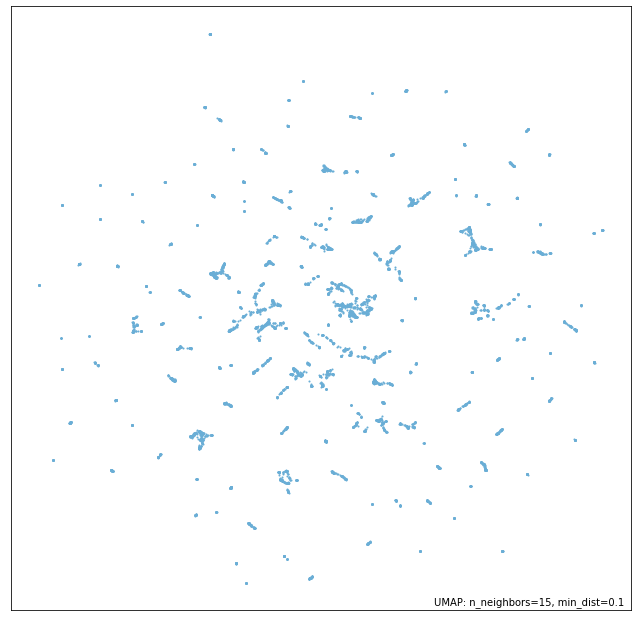

In [46]:
umap.plot.points(embedding)

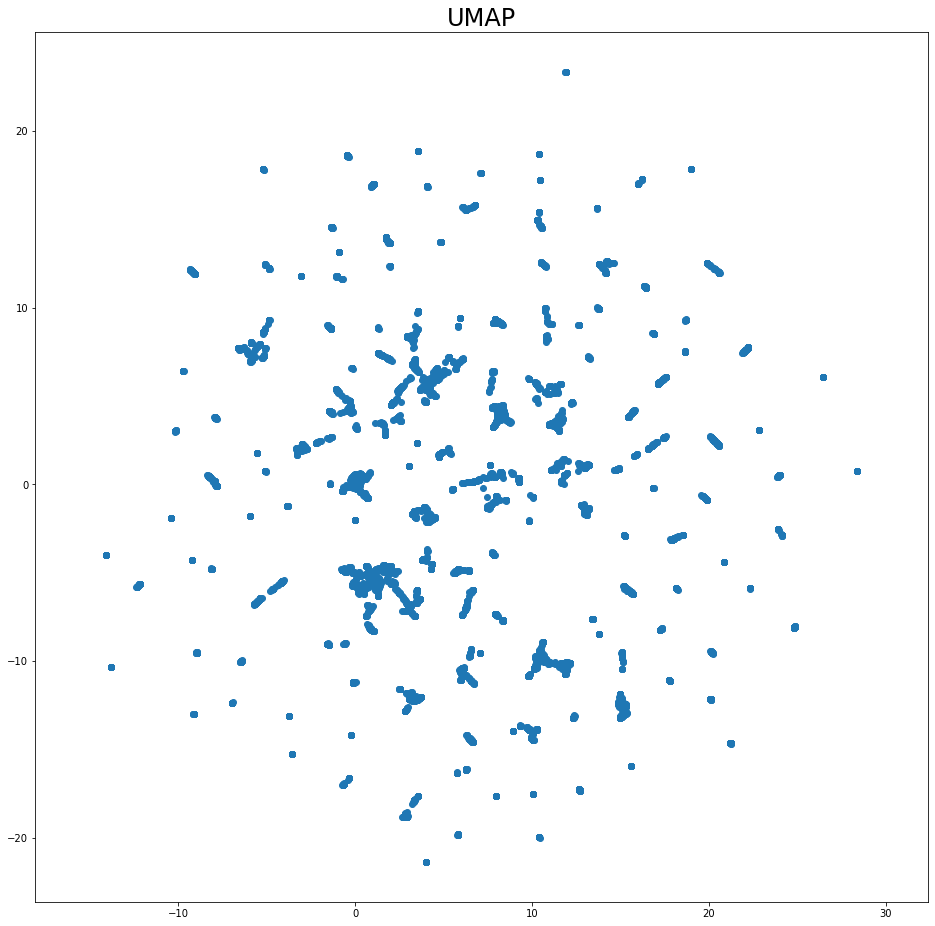

In [36]:
plt.figure(figsize=(16,16))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24);